In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re           
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from bs4 import BeautifulSoup 

In [2]:
data = pd.read_csv('./Dataset/reviews(1-14).csv')

In [3]:
data.head()

,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns
0,1. Most of the times the screen share option c...,1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c...","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}"
1,aaditya tried everything but his mic did not w...,1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717...","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}"
2,activities are not visible\n,1.0,06611ce3-2636-4060-8fe6-beff2a09a7c0,Meenakshi Nagpal,7988189284,41266605-d286-421f-be95-ed0423ba1d1d,2020-09-05T11:00:00+05:30,3,"{191a5fc4-debe-4108-adab-18e8bfe2ddcc,329d4597...","{HARSHPREET,""Palak goel "",SINCHANA}","{6239228140,9311489275,9740879988}"
3,"Anurag is having least intrest in this class, ...",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469...","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}"
4,At end of the class. I and aliza both face som...,1.0,55aebf7f-6a90-491e-931d-3e0e0666dca8,Riya Makhani,6353905546,61c64a19-4c80-4fd3-a67f-58e69037c1fb,2020-09-02T16:00:00+05:30,1,{5407c90c-ab9c-4228-b2a0-071d8e3d496f},{ALIZAA},{7417134771}


In [4]:
data.shape

(3311, 11)

In [5]:
data.dtypes

product_feedback     object
product_rating      float64
teacher_id           object
teacher_name         object
teacher_rmn           int64
vc_id                object
start_time           object
count_students        int64
student_ids          object
student_names        object
student_rmns         object
dtype: object

In [6]:
data.isnull().sum()

product_feedback    2144
product_rating       869
teacher_id             0
teacher_name           0
teacher_rmn            0
vc_id                  0
start_time             0
count_students         0
student_ids            0
student_names          0
student_rmns           0
dtype: int64

In [7]:
data.describe

<bound method NDFrame.describe of                                        product_feedback  product_rating  \
0     1. Most of the times the screen share option c...             1.0   
1     aaditya tried everything but his mic did not w...             1.0   
2                         activities are  not visible\n             1.0   
3     Anurag is having least intrest in this class, ...             1.0   
4     At end of the class. I and aliza both face som...             1.0   
...                                                 ...             ...   
3306                                                NaN             NaN   
3307                                                NaN             NaN   
3308                                                NaN             NaN   
3309                                                NaN             NaN   
3310                                                NaN             NaN   

                                teacher_id        teacher_name  t

<AxesSubplot:xlabel='rating_with_NA', ylabel='count'>

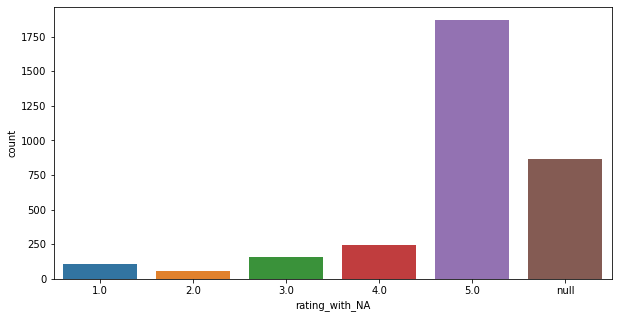

In [8]:
plt.figure(figsize=(10,5))
data["rating_with_NA"] = data['product_rating'].fillna('null')
sns.countplot(data['rating_with_NA'])

Text(0.5, 0, 'Null Reviews')

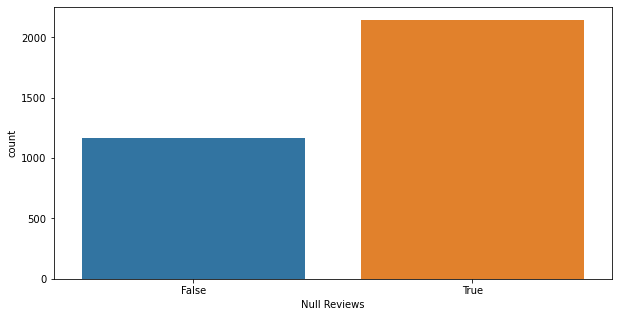

In [9]:
plt.figure(figsize=(10,5))
ax =sns.countplot(data['product_feedback'].isnull())
ax.set_xlabel(xlabel="Null Reviews")

In [10]:
data = data.dropna(subset=['product_feedback'])

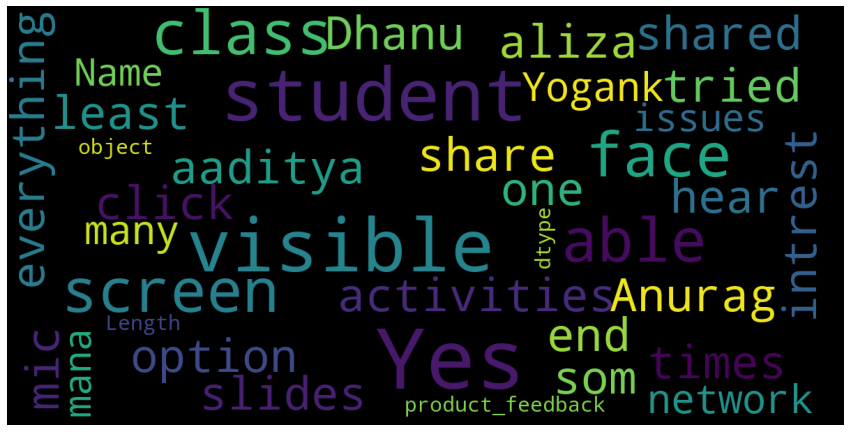

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['product_feedback'])

<ipython-input-12-95c2fe3eb5c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews_length']=data['product_feedback'].apply(len)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


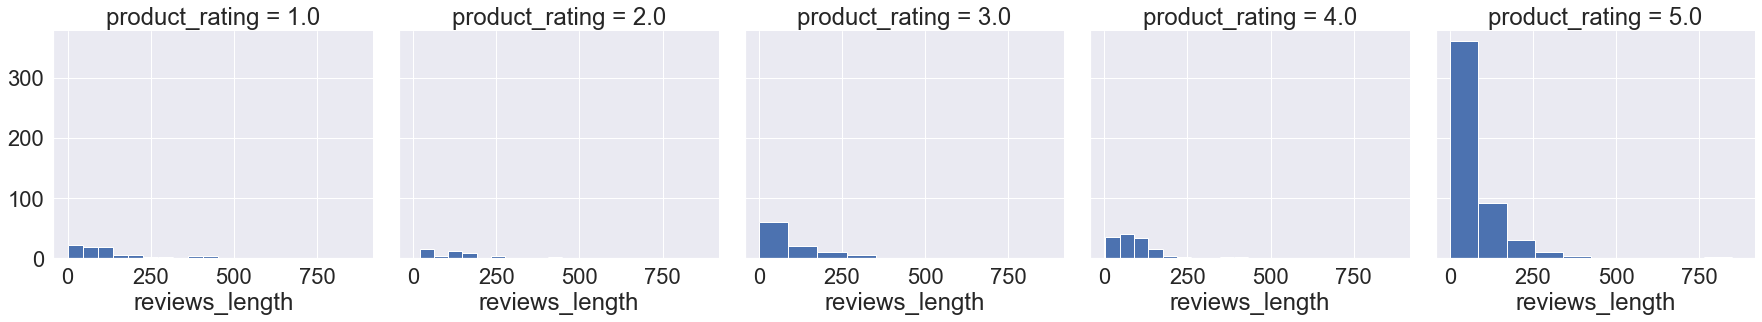

In [12]:
data['reviews_length']=data['product_feedback'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='product_rating',size=5)
g.map(plt.hist,'reviews_length')

<AxesSubplot:>

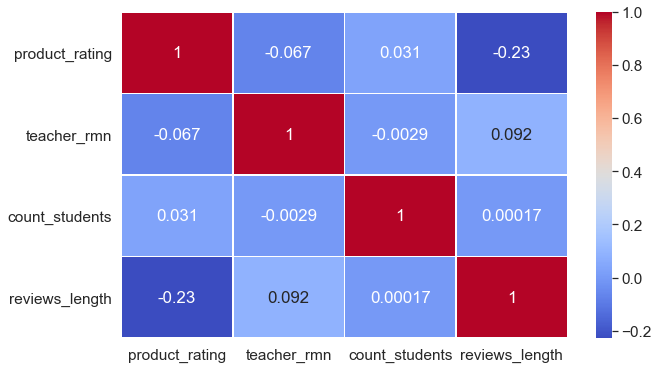

In [13]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [14]:
all_text = data['product_feedback']
for i in range(min(10, len(all_text))):
    print(all_text[i])
    print("#========================================#")

1. Most of the times the screen share option creates technical issues and ruins the class. (Even when network is good).
2. Student (Saksham, Grade 7, Maths) had some issue after I tried sharing screen, he turned offline and was not able to re-login.
3. Game website on slide number 10 - (https://in.mathgames.com/skill/7.8-multiply-fractions) always takes a lot of time in opening.
#========================================#
aaditya tried everything but his mic did not work, kaveri was not near the screen but could hear her talking in the background  
#========================================#
activities are  not visible

#========================================#
Anurag is having least intrest in this class, but he is more focus on class book problem. I solve some .
Kartik join late but great student , weak in some sort of calculation.
#========================================#
At end of the class. I and aliza both face some networking issues. But I managed it and try to complete the clas

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


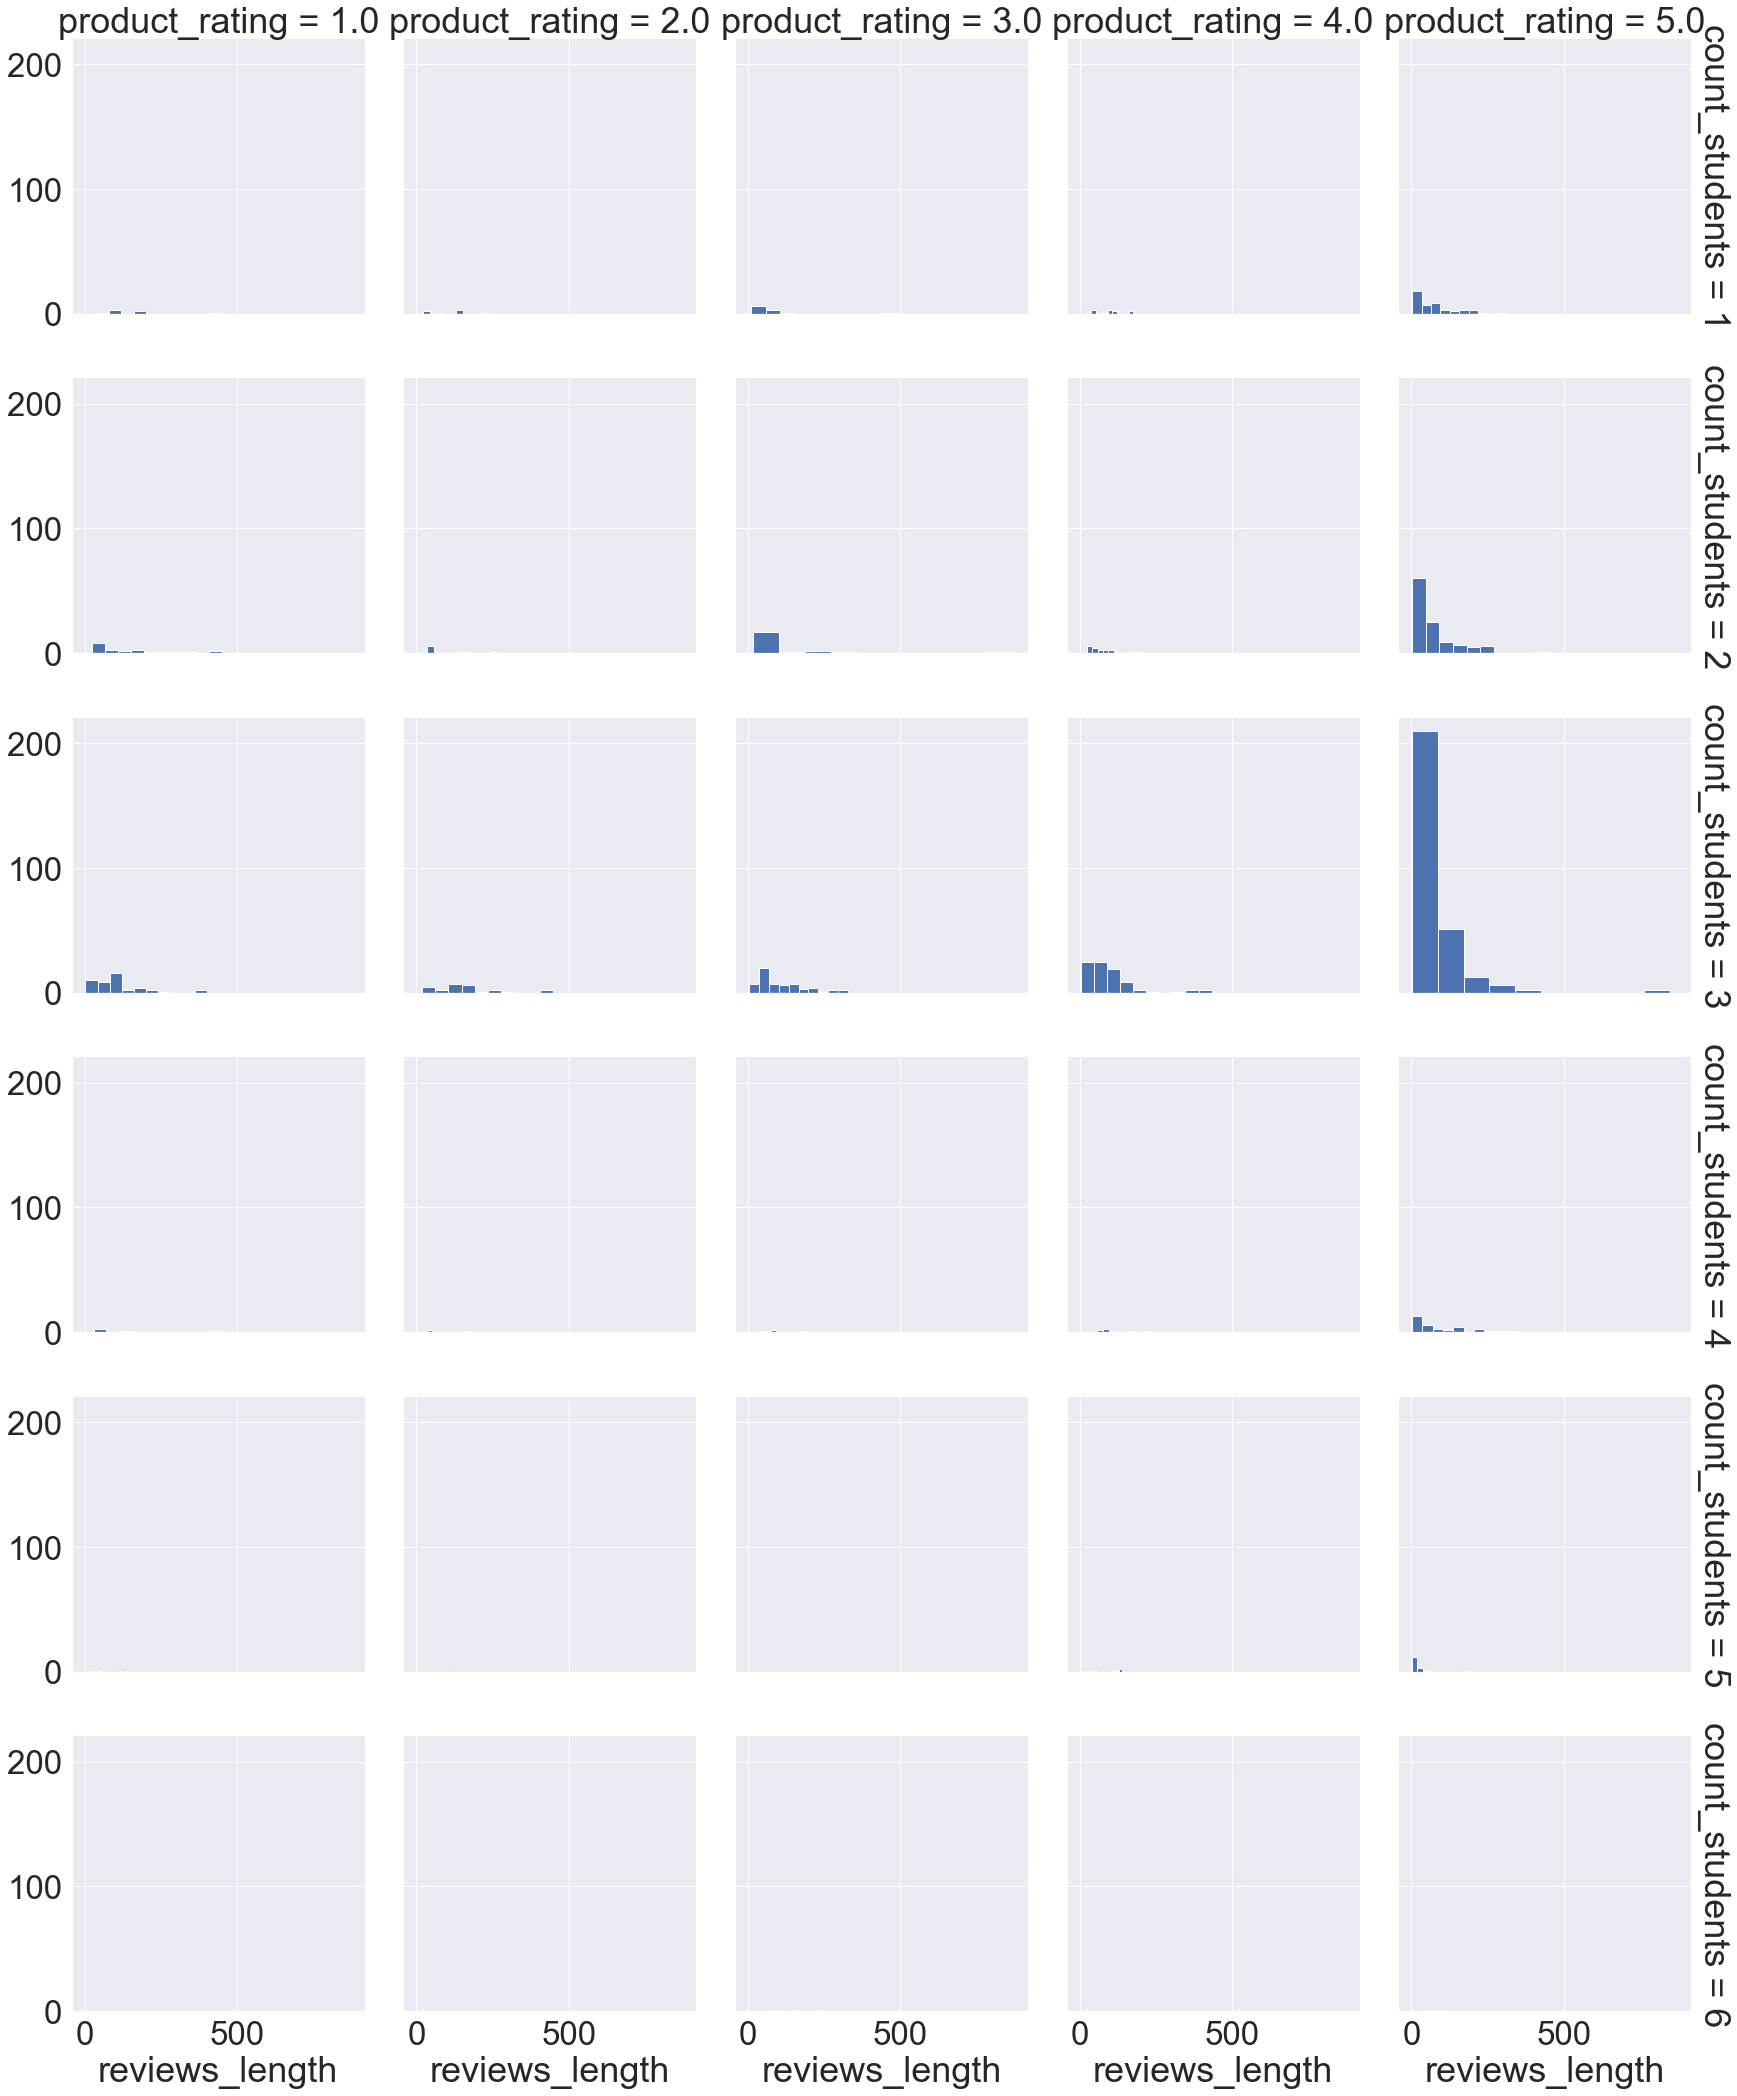

In [15]:
sns.set(font_scale=3.0)

g = sns.FacetGrid(data,col='product_rating', row= 'count_students',size=5, margin_titles=True)
g.map(plt.hist,'reviews_length')

In [16]:
overall_avg_rating = data["product_rating"].mean(skipna = True)
overall_avg_reviews_length = data["reviews_length"].mean(skipna = True)
print("overall_avg_rating: {}, overall_avg_reviews_length: {}".format(overall_avg_rating, overall_avg_reviews_length) )

overall_avg_rating: 4.065972222222222, overall_avg_reviews_length: 85.79777206512425


In [17]:
avg_feedback_length_per_teacher = data.groupby("teacher_name").agg({"reviews_length" : np.mean})
avg_feedback_length_per_teacher

,reviews_length
teacher_name,
Aanchal Chopra,15.400000
Aayushi Kumari,53.333333
Abhimanyu Chaudhary,192.000000
Abhishek Sharma,61.500000
Abhishikta,55.666667
...,...
Vignesh M,105.142857
Vivek Gaurav,101.000000
Vivek Surve,63.000000


In [18]:
avg_feedback_length_per_teacher.sort_values(by='reviews_length', ascending=False, na_position='last')

,reviews_length
teacher_name,
Madhura Mohan,340.000000
Nitika Jain,332.000000
Mansi Patel,308.900000
Sakshi Malav,277.000000
Nayana A R,248.000000
...,...
Jalaj Srivastava,10.647059
Meenakshi Nagpal,9.875000
Maitrey Choudhary,4.769231


In [19]:
avg_rating_per_teacher = data.groupby("teacher_name").agg({"product_rating" : np.mean})
avg_rating_per_teacher

,product_rating
teacher_name,
Aanchal Chopra,4.40
Aayushi Kumari,2.50
Abhimanyu Chaudhary,3.25
Abhishek Sharma,1.00
Abhishikta,1.00
...,...
Vignesh M,3.00
Vivek Gaurav,NaN
Vivek Surve,5.00


In [21]:
##### Text Cleaning ######

#No of words in reviews
data['number_of_words'] = data.product_feedback.apply(lambda x: len(x.split()))

# Remove Cleaned Feedback
index_names = data[ data['number_of_words'] <= 4  ].index
data.drop(index_names, inplace = True) 

# Lower
data['cleaned_feedback'] = data['product_feedback'].str.lower() 

# Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_urls(text))

# Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_punctuation(text))

<ipython-input-21-0d4c9854a3f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number_of_words'] = data.product_feedback.apply(lambda x: len(x.split()))
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-21-0d4c9854a3f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [28]:
data.shape

(853, 15)

In [22]:
# Frequent Words
from collections import Counter
cnt = Counter()
for text in data['cleaned_feedback'].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
cnt.most_common(10)

[('the', 927),
 ('to', 702),
 ('was', 603),
 ('and', 502),
 ('not', 426),
 ('i', 398),
 ('class', 350),
 ('student', 340),
 ('but', 251),
 ('able', 241)]

In [23]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: lemmatize_words(text))

<ipython-input-23-f30d1d36fa0e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: lemmatize_words(text))


In [24]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: correct_spellings(text))

<ipython-input-24-a117cfc83bdb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: correct_spellings(text))


In [34]:
cleaned_text = data['cleaned_feedback']
cleaned_text[3]

'aura be have least interest in this class but he be more focus on class book problem i solve some martin join late but great student weak in some sort of calculation'

In [25]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [26]:
natural_language_understanding = NaturalLanguageUnderstandingV1(                                         
    version='2020-08-01',
    iam_apikey='bXSAw6fRZRB4OJCfBNQgnGdH-h3KrkNs-bftWJwrbx73', # Use your API key here
    url='https://api.kr-seo.natural-language-understanding.watson.cloud.ibm.com/instances/0fcf4d52-23ce-47cc-ba82-d9f47e3735fe' # paste the url here
    )
def Sentiment_score(input_text): 
    # Input text can be sentence, paragraph or document
    response = natural_language_understanding.analyze (
    text = input_text,
    features = Features(sentiment=SentimentOptions())).get_result()
    # From the response extract score which is between -1 to 1
    res = response.get('sentiment').get('document').get('score')
    return res

<ipython-input-26-892fbe57f2ef>:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  natural_language_understanding = NaturalLanguageUnderstandingV1(


In [27]:
list_desc = list()

df = data['cleaned_feedback'].astype(str)

def f(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

for row in df:
    list_desc.append((row, Sentiment_score(row)))
    df = pd.DataFrame(list_desc, columns = ['sentence','sentiment'])
    

df['Sentiment_Type'] = df.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


WatsonApiException: Error: unsupported text language: da, Code: 400 , X-dp-watson-tran-id: f7b7c6e9122d0f5db9584b1b7ab707a0 , X-global-transaction-id: f7b7c6e9122d0f5db9584b1b7ab707a0